In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

import s3fs
import gzip

from sagemaker import get_execution_role
role = get_execution_role()

In [2]:
fs = s3fs.S3FileSystem()
final_df = pd.DataFrame()
df= pd.DataFrame()
df_eda = pd.DataFrame()
s3fs_obj= s3fs.S3FileSystem()
mini_df = pd.DataFrame()

In [3]:
with fs.open('s3://c3-training-data/final_df_2020_eda_set.csv', 'rb') as f:
    decoded = gzip.GzipFile(fileobj=f)
    df_eda = pd.read_csv(decoded)

In [4]:
df_eda.count()

Unnamed: 0                     302136768
identity/TimeInterval          302136768
bill/BillingEntity             302136768
bill/BillType                  302136768
bill/BillingPeriodStartDate    302136768
bill/BillingPeriodEndDate      302136768
lineItem/UsageAccountId        302136768
lineItem/LineItemType          302136768
lineItem/UsageStartDate        302136768
lineItem/UsageEndDate          302136768
lineItem/ProductCode           302136768
lineItem/UsageAmount           302136768
lineItem/CurrencyCode          302136768
lineItem/UnblendedCost         302136768
lineItem/BlendedCost           302136768
product/ProductName            302136768
product/productFamily          302136768
product/region                 302136768
pricing/publicOnDemandCost     302136768
pricing/term                   302136768
Total_cost                     302136768
dtype: int64

In [5]:
df_eda.head()

,Unnamed: 0,identity/TimeInterval,bill/BillingEntity,bill/BillType,bill/BillingPeriodStartDate,bill/BillingPeriodEndDate,lineItem/UsageAccountId,lineItem/LineItemType,lineItem/UsageStartDate,lineItem/UsageEndDate,...,lineItem/UsageAmount,lineItem/CurrencyCode,lineItem/UnblendedCost,lineItem/BlendedCost,product/ProductName,product/productFamily,product/region,pricing/publicOnDemandCost,pricing/term,Total_cost
0,0,2020-01-01T00:00:00Z/2020-02-01T00:00:00Z,AWS,Anniversary,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,851677588718,Tax,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,...,1.0,USD,0.0,0.0,AWS Cost Explorer,Unknown,us-east-1,0.0,Unknown,1.0
1,1,2020-01-01T00:00:00Z/2020-02-01T00:00:00Z,AWS,Anniversary,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,793495714907,Tax,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,...,1.0,USD,0.0,0.0,AWS Cost Explorer,Unknown,Unknown,0.0,Unknown,1.0
2,2,2020-01-01T00:00:00Z/2020-02-01T00:00:00Z,AWS,Anniversary,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,580223315608,Tax,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,...,1.0,USD,0.0,0.0,AWS Cost Explorer,Unknown,Unknown,0.0,Unknown,1.0
3,3,2020-01-01T00:00:00Z/2020-02-01T00:00:00Z,AWS,Anniversary,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,571230983818,Tax,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,...,1.0,USD,0.0,0.0,AWS Cost Explorer,Unknown,Unknown,0.0,Unknown,1.0
4,4,2020-01-01T00:00:00Z/2020-02-01T00:00:00Z,AWS,Anniversary,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,747531803056,Tax,2020-01-01T00:00:00Z,2020-02-01T00:00:00Z,...,1.0,USD,0.0,0.0,AWS Cost Explorer,Unknown,Unknown,0.0,Unknown,1.0


In [6]:
df_eda.drop(['Unnamed: 0','identity/TimeInterval','lineItem/CurrencyCode','lineItem/UsageStartDate','bill/BillingPeriodEndDate','lineItem/UsageEndDate','product/region','lineItem/UnblendedCost','lineItem/UsageAmount','pricing/publicOnDemandCost','product/ProductName'], axis=1, inplace=True)


In [7]:
df_eda.head(100)

,bill/BillingEntity,bill/BillType,bill/BillingPeriodStartDate,lineItem/UsageAccountId,lineItem/LineItemType,lineItem/ProductCode,lineItem/BlendedCost,product/productFamily,pricing/term,Total_cost
0,AWS,Anniversary,2020-01-01T00:00:00Z,851677588718,Tax,AWSCostExplorer,0.0,Unknown,Unknown,1.0
1,AWS,Anniversary,2020-01-01T00:00:00Z,793495714907,Tax,AWSCostExplorer,0.0,Unknown,Unknown,1.0
2,AWS,Anniversary,2020-01-01T00:00:00Z,580223315608,Tax,AWSCostExplorer,0.0,Unknown,Unknown,1.0
3,AWS,Anniversary,2020-01-01T00:00:00Z,571230983818,Tax,AWSCostExplorer,0.0,Unknown,Unknown,1.0
4,AWS,Anniversary,2020-01-01T00:00:00Z,747531803056,Tax,AWSCostExplorer,0.0,Unknown,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...
95,AWS,Anniversary,2020-01-01T00:00:00Z,314807875880,Tax,AmazonEC2,0.0,Unknown,Unknown,1.0
96,AWS,Anniversary,2020-01-01T00:00:00Z,96142538562,Tax,AmazonEC2,0.0,Unknown,Unknown,1.0
97,AWS,Anniversary,2020-01-01T00:00:00Z,96142538562,Tax,AmazonEC2,0.0,Unknown,Unknown,1.0
98,AWS,Anniversary,2020-01-01T00:00:00Z,96142538562,Tax,AWSDataTransfer,0.0,Unknown,Unknown,1.0


In [8]:
#Reversing the Total_cost calculation
#df_eda.drop('Total_cost', axis =1, inplace = True)

In [9]:
df_eda['lineItem/BlendedCost'].unique()

array([0.        , 0.84      , 0.74      , ..., 2.3371113 , 0.0148787 ,
       0.40608695])

In [10]:
#Dropping the records where cost is 0.0

df_eda.drop(df_eda.loc[df_eda['lineItem/BlendedCost']==0.0].index, inplace=True)

In [11]:
#One Hot Encoding the categorical columns

dummy_LineItemType = pd.get_dummies(df_eda['lineItem/LineItemType'])
dummy_BillType = pd.get_dummies(df_eda['bill/BillType'])
dummy_PricingTerm = pd.get_dummies(df_eda['pricing/term'])
dummy_BillingEntity = pd.get_dummies(df_eda['bill/BillingEntity'])

In [12]:
#Dropping the categorical columns after creating OHE columns

df_eda.drop('lineItem/LineItemType', axis=1, inplace=True)
df_eda.drop('bill/BillingEntity', axis=1, inplace=True)
df_eda.drop('bill/BillType', axis=1, inplace=True)
df_eda.drop('pricing/term', axis=1, inplace=True)
df_eda.drop('product/productFamily', axis=1, inplace=True)

In [13]:
#Appending OHE columns to the dataFrame

df_eda = pd.concat([df_eda,dummy_LineItemType] , axis = 1)
df_eda = pd.concat([df_eda,dummy_BillType] , axis = 1)
df_eda = pd.concat([df_eda,dummy_BillingEntity] , axis = 1)
df_eda = pd.concat([df_eda,dummy_PricingTerm] , axis = 1)

In [14]:
#Printing Dataset shape - Rows, columns
df_eda.shape

(220427174, 22)

In [15]:
df_eda.columns

Index(['bill/BillingPeriodStartDate', 'lineItem/UsageAccountId',
       'lineItem/ProductCode', 'lineItem/BlendedCost', 'Credit',
       'DiscountedUsage', 'Fee', 'RIFee', 'Refund', 'SavingsPlanCoveredUsage',
       'SavingsPlanNegation', 'SavingsPlanRecurringFee', 'Tax', 'Usage',
       'Anniversary', 'Purchase', 'Refund', 'AWS', 'AWS Marketplace',
       'OnDemand', 'Reserved', 'Unknown'],
      dtype='object')

In [17]:
df_eda.head(10)

,bill/BillingPeriodStartDate,lineItem/UsageAccountId,lineItem/ProductCode,lineItem/BlendedCost,Credit,DiscountedUsage,Fee,RIFee,Refund,SavingsPlanCoveredUsage,...,Tax,Usage,Anniversary,Purchase,Refund,AWS,AWS Marketplace,OnDemand,Reserved,Unknown
13,2020-01-01T00:00:00Z,512106327079,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
14,2020-01-01T00:00:00Z,512106327079,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
19,2020-01-01T00:00:00Z,747531803056,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
20,2020-01-01T00:00:00Z,747531803056,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
29,2020-01-01T00:00:00Z,71580153059,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
30,2020-01-01T00:00:00Z,71580153059,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
31,2020-01-01T00:00:00Z,571230983818,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
32,2020-01-01T00:00:00Z,571230983818,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
33,2020-01-01T00:00:00Z,851677588718,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
34,2020-01-01T00:00:00Z,851677588718,AWSCostExplorer,0.84,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0


In [20]:
df_eda['lineItem/ProductCode'] = smoothing_target_encoder(df_eda, column='lineItem/ProductCode', target='lineItem/BlendedCost', weight=100)

In [19]:
def smoothing_target_encoder(df, column, target, weight=100):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. This replaces the
    categorical variable with just one new numerical variable. Each category or level of the categorical variable
    is represented by it's summary statistic of the target. Main purpose is to deal with high cardinality categorical
    features.
    Smoothing adds the requirement that there must be at least m values for the sample mean to replace the global mean.
    Source: https://www.wikiwand.com/en/Additive_smoothing
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (string): Categorical variable column to be encoded.
        target (string): Target on which to encode.
        method (string): Summary statistic of the target.
        weight (int): Weight of the overall mean.
    Returns:
        array: Encoded categorical variable column.
    """
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the 'smoothed' means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    return df[column].map(smooth)

In [21]:
df_eda['bill/BillingPeriodStartDate'] = pd.to_datetime(df_eda['bill/BillingPeriodStartDate']).dt.to_period('M')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [24]:
df_eda.tail(100)

,bill/BillingPeriodStartDate,lineItem/UsageAccountId,lineItem/ProductCode,lineItem/BlendedCost,Credit,DiscountedUsage,Fee,RIFee,Refund,SavingsPlanCoveredUsage,...,Tax,Usage,Anniversary,Purchase,Refund,AWS,AWS Marketplace,OnDemand,Reserved,Unknown
302136605,2020-04,503171153409,0.848217,7.378654e-04,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136613,2020-04,503171153409,0.848217,1.188000e-07,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136614,2020-04,503171153409,0.848217,5.305253e-02,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136616,2020-04,503171153409,0.848217,5.391440e-05,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136617,2020-04,503171153409,0.848217,5.086200e-06,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302136759,2020-04,503171153409,0.848217,4.103000e-06,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136760,2020-04,503171153409,0.848217,1.454649e-04,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136761,2020-04,503171153409,0.848217,1.258952e-03,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
302136762,2020-04,503171153409,0.848217,3.425334e-04,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0


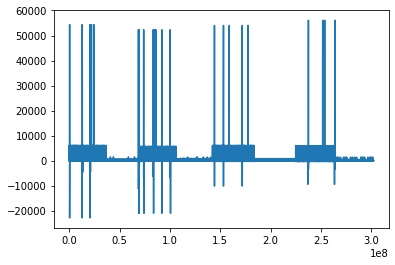

In [18]:
import matplotlib.pyplot as plt
plt.plot(df_eda['lineItem/BlendedCost'])

In [23]:
import io
import gzip
import boto3

s3 = boto3.client('s3')
buffer = io.BytesIO()     
with gzip.GzipFile(fileobj=buffer, mode="wb") as f:
    f.write(df_eda.to_csv().encode())
buffer.seek(0)

s3.upload_fileobj(buffer, 'c3-training-data', 'df_eda_aws.csv')